### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


from keras.models import Sequential
from keras.layers import Dense,InputLayer,BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Loading Image Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip '/content/drive/MyDrive/Dataset.zip'

Archive:  /content/drive/MyDrive/Dataset.zip
  inflating: emergency_classification.csv  
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/1000.jpg         
  inflating: images/1001.jpg         
  inflating: images/1002.jpg         
  inflating: images/1003.jpg         
  inflating: images/1004.jpg         
  inflating: images/1005.jpg         
  inflating: images/1006.jpg         
  inflating: images/1007.jpg         
  inflating: images/1008.jpg         
  inflating: images/1009.jpg         
  inflating: images/101.jpg          
  inflating: images/1010.jpg         
  inflating: images/1011.jpg         
  inflating: images/1012.jpg         
  inflating: images/1013.jpg         
  inflating: images/1014.jpg         
  inflating: images/1015.jpg         
  inflating: images/1016.jpg         
  inflating: images/1017.jpg         
  inflating: images/1018.jpg         

In [ ]:
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
data = pd.read_csv('emergency_classification.csv')
data

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1
...,...,...
2347,2347.jpg,0
2348,2348.jpg,0
2349,2349.jpg,0
2350,2350.jpg,0


In [ ]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [ ]:
X = []
for img_name in data['image_names']:
  img = plt.imread('images/'+img_name)
  X.append(img)

In [ ]:
X = np.array(X)

In [ ]:
y = data['emergency_or_not'].values

In [ ]:
X.shape

(2352, 224, 224, 3)

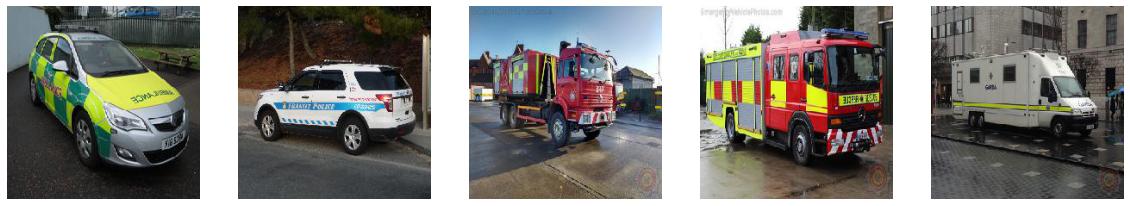

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 5,figsize =(20,20))
for i in range(5):
  ax[i].imshow(X[i])
  ax[i].axis('off')


In [ ]:
X = X.reshape(X.shape[0],224*224*3)
X.shape

(2352, 150528)

In [ ]:
X.min() , X.max()

(0, 255)

In [ ]:
X = X/X.max()

In [ ]:
X.min() ,X.max()

(0.0, 1.0)

### **Splitting Data in training and test data**

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = seed)

In [ ]:
train_x.shape , test_x.shape , train_y.shape ,test_y.shape

((1881, 150528), (471, 150528), (1881,), (471,))

In [ ]:
train_x.shape[1]

150528

### **Model Building**

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (train_x.shape[1])))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(units =1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer= 'sgd',metrics = ['accuracy'])

### **Training the Image Data**

In [ ]:
model_history = model.fit(train_x,train_y, batch_size = 128,epochs = 50,validation_data = (test_x,test_y))

Epoch 1/50
15/15 [==============================] - 1s 63ms/step - loss: 0.9786 - accuracy: 0.5458 - val_loss: 0.6583 - val_accuracy: 0.6030
Epoch 2/50
15/15 [==============================] - 1s 49ms/step - loss: 0.6608 - accuracy: 0.6067 - val_loss: 0.6583 - val_accuracy: 0.5754
Epoch 3/50
15/15 [==============================] - 1s 48ms/step - loss: 0.6648 - accuracy: 0.6168 - val_loss: 0.6875 - val_accuracy: 0.5648
Epoch 4/50
15/15 [==============================] - 1s 49ms/step - loss: 0.6483 - accuracy: 0.6123 - val_loss: 0.6540 - val_accuracy: 0.6518
Epoch 5/50
15/15 [==============================] - 1s 48ms/step - loss: 0.6315 - accuracy: 0.6684 - val_loss: 0.6801 - val_accuracy: 0.5987
Epoch 6/50
15/15 [==============================] - 1s 48ms/step - loss: 0.6305 - accuracy: 0.6434 - val_loss: 0.6470 - val_accuracy: 0.6391
Epoch 7/50
15/15 [==============================] - 1s 49ms/step - loss: 0.6131 - accuracy: 0.6640 - val_loss: 0.6241 - val_accuracy: 0.6454
Epoch 8/50
15

In [ ]:
predictions = model.predict_classes(test_x)[:,0]
prediction_probabilities = model.predict(test_x)[:,0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### **Checking Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:',accuracy_score(test_y,predictions),'%')

Accuracy on validation set: 0.7006369426751592 %


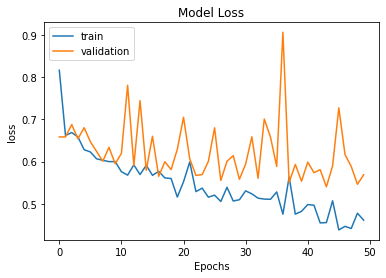

In [ ]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

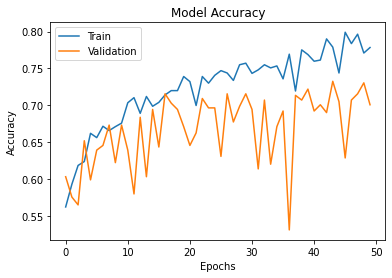

In [ ]:
# Summarize for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

In [ ]:
_,valid_vehicles,_,valid_y = train_test_split(data.image_names.values,y,test_size = 0.2,random_state = seed)

In [ ]:
index = rng.choice(range(len(valid_vehicles)))

In [ ]:
img_name = valid_vehicles[index]

In [ ]:
prob = (prediction_probabilities * 100).astype(int)[index]

In [ ]:
img = plt.imread('images/'+ img_name)

Model is 72 % sure that it is emergency vehicle
Actual class is 1


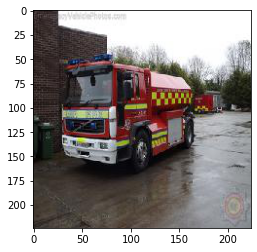

In [ ]:
print('Model is',prob,'% sure that it is emergency vehicle')
print('Actual class is',valid_y[index])
plt.imshow(img)

### **Using Convolution Neural Network**

### **Loading Image Data**

In [ ]:
data

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1
...,...,...
2347,2347.jpg,0
2348,2348.jpg,0
2349,2349.jpg,0
2350,2350.jpg,0


In [ ]:
X = []
for img_name in data['image_names']:
  img = plt.imread('images/'+img_name)
  X.append(img)

In [ ]:
X = np.array(X)

In [ ]:
y = data['emergency_or_not'].values

In [ ]:
X.shape

(2352, 224, 224, 3)

In [ ]:
y.shape

(2352,)

In [ ]:
X = X/X.max()

### **Splitting data into train and test**

In [ ]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

### **Model Building**

In [ ]:
# defining the model architecture

# creating a sequential model 
conv_model = Sequential()
    
# defining input layer with 3D input of shape (224,224,3)
conv_model.add(InputLayer(input_shape=(224,224,3)))

# defining the first convolutional layer with 25 filters of size (5,5)
conv_model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
conv_model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# flattening the output from convolutional layers so that it can be forwarded to the dense layers
conv_model.add(Flatten())

# defining the first dense or fully connected layer with 100 neurons
conv_model.add(Dense(units=100, activation='sigmoid'))
# defining the output layer with 1 neuron since it is a binary classification problem
conv_model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten (Flatten)            (None, 2332800)           0         
_________________________________________________________________
dense (Dense)                (None, 100)               233280100 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
conv_model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

### **Training the Model**

In [ ]:
# training the model
conv_model_history = conv_model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 18s 694ms/step - loss: 0.8101 - accuracy: 0.5870 - val_loss: 0.6667 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 6s 467ms/step - loss: 0.6499 - accuracy: 0.6151 - val_loss: 0.6395 - val_accuracy: 0.6289
Epoch 3/10
13/13 [==============================] - 6s 470ms/step - loss: 0.6335 - accuracy: 0.6461 - val_loss: 0.6106 - val_accuracy: 0.6756
Epoch 4/10
13/13 [==============================] - 6s 471ms/step - loss: 0.6055 - accuracy: 0.6913 - val_loss: 0.6298 - val_accuracy: 0.6501
Epoch 5/10
13/13 [==============================] - 6s 472ms/step - loss: 0.6033 - accuracy: 0.6726 - val_loss: 0.6008 - val_accuracy: 0.6756
Epoch 6/10
13/13 [==============================] - 6s 476ms/step - loss: 0.5791 - accuracy: 0.6993 - val_loss: 0.5929 - val_accuracy: 0.6870
Epoch 7/10
13/13 [==============================] - 6s 476ms/step - loss: 0.5626 - accuracy: 0.7257 - val_loss: 0.5757 - val_accuracy: 0.7040
Epoch

### **Checking Accuracy**

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, conv_model.predict_classes(X_train)), '%')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy on training set: 0.7503037667071689 %


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, conv_model.predict_classes(X_valid)), '%')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy on validation set: 0.7138810198300283 %


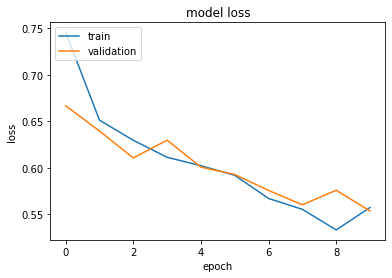

In [ ]:
# summarize history for loss
plt.plot(conv_model_history.history['loss'])
plt.plot(conv_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

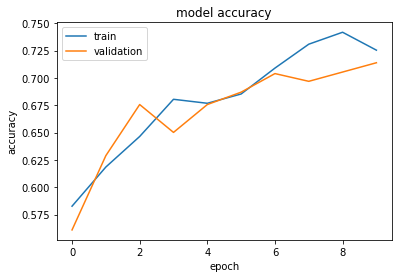

In [ ]:
# summarize history for accuracy
plt.plot(conv_model_history.history['accuracy'])
plt.plot(conv_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()